In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Inspector = inspect(engine)
Inspector.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

# columns = Inspector.get_columns('measurement')
# for c in columns:
#     print(c['name'], c["type"])
    
columns = Inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Just checking out the table data
# engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_results = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
most_recent = date_results[0][0]
most_recent_dt = dt.datetime.strptime(most_recent, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.

one_year_prior = most_recent_dt - dt.timedelta(days=365)
# one_year_prior

# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_prior).\
    order_by(Measurement.date).all()
# prcp_results

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_results)
prcp_df = prcp_df.set_index('date')
prcp_df.head(20)

# Sort the dataframe by date
# already done

# Fill NaN's
prcp_df = prcp_df.fillna(0)
prcp_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22


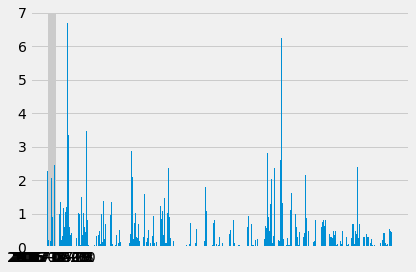

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(prcp_df.index, prcp_df['prcp'])
dates_str = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_str]

plt.xticks(np.arange(len(dates)), labels = dates_str) 

plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
# session.close()